In [1]:
import pandas as pd
import numpy as np

#stack
df=pd.DataFrame({"index":[1,2,3],"alpha":["A","B","C"],"values":[11,22,33],"xyz":["x","y","z"]})
df

,index,alpha,values,xyz
0,1,A,11,x
1,2,B,22,y
2,3,C,33,z


In [2]:
df_stack=df.stack()
df_stack

0  index      1
   alpha      A
   values    11
   xyz        x
1  index      2
   alpha      B
   values    22
   xyz        y
2  index      3
   alpha      C
   values    33
   xyz        z
dtype: object

In [3]:
df_unstack=df_stack.unstack()
df_unstack

,index,alpha,values,xyz
0,1,A,11,x
1,2,B,22,y
2,3,C,33,z


#### crosstab(교차표)
지정된 컬럼의 값별 빈도를 요약하여 도수분포표,분할표 생성(빈도 현황 파악)

In [4]:
df[df.duplicated()]

,index,alpha,values,xyz


# 데이터 정제하기 연습

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [6]:
df_raw=pd.read_csv("/home/piai/다운로드/1 Big Data 분석 기초/FITNESS_결측.csv",encoding="euc-kr")

In [7]:
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,NaN,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185


In [8]:
#결측치 확인하기
df_raw.isnull().sum()

NAME        0
GENDER      1
AGE         0
AGEGROUP    0
WEIGHT      2
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
dtype: int64

In [9]:
df_raw["GENDER"].value_counts()

여성    15
남성    15
Name: GENDER, dtype: int64

In [10]:
df_raw["GENDER"].fillna("여성",inplace=True)

In [11]:
df_raw.isnull().sum()

NAME        0
GENDER      0
AGE         0
AGEGROUP    0
WEIGHT      2
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
dtype: int64

In [12]:
#연속형 변수 결측치 처리:GENDER별 WEIGHT평균 계산 및 대체
df_raw.groupby("GENDER").agg("mean")

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
GENDER,,,,,,,
남성,46.333333,82.433077,44.753733,11.19400,172.20,62.4000,175.800
여성,47.312500,72.908750,49.834000,10.01625,167.25,51.3125,171.875


In [13]:
df_raw["WEIGHT"]=df_raw["WEIGHT"].fillna(df_raw.groupby("GENDER")["WEIGHT"].transform("mean"))

In [14]:
df_raw

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150000,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870000,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840000,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870000,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433077,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.020000,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.320000,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.320000,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.080000,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.910000,46.672,10.00,162,48,168


<AxesSubplot:>

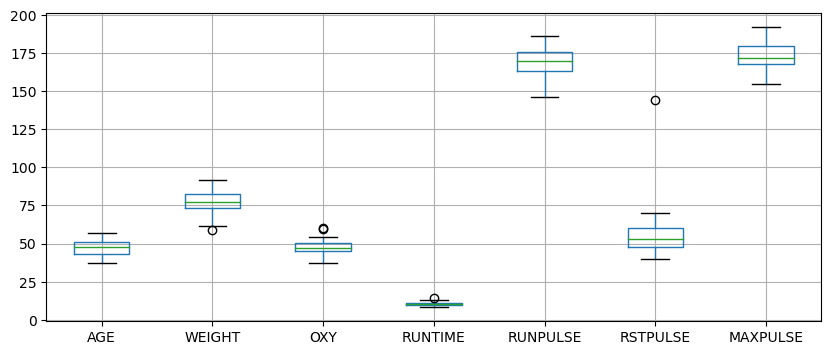

In [15]:
#이상치 확인하기
df_raw.boxplot(figsize=(10,4))

In [18]:
#RSTPULSE의 100넘는 값을 이상치로 판단
df_raw[df_raw["RSTPULSE"]>100]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172


In [22]:
df_fitness=df_raw[df_raw["RSTPULSE"]<100]
df_fitness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150000,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870000,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840000,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870000,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433077,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.020000,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.320000,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.320000,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.080000,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.910000,46.672,10.00,162,48,168


In [23]:
#인덱스를 조정하기
df_fitness.reset_index(drop=True,inplace=True)

In [24]:
#Scale변환
df_fitness_num=df_fitness.select_dtypes(exclude="object")
df_fitness_num

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,42,68.150000,59.571,8.17,166,40,172
1,38,81.870000,60.055,8.63,170,48,186
2,43,85.840000,54.297,8.65,156,45,168
3,50,70.870000,54.625,8.92,146,48,155
4,49,82.433077,49.156,8.95,180,44,185
5,38,89.020000,49.874,9.22,178,55,180
6,49,76.320000,48.673,9.40,186,56,188
7,52,76.320000,45.441,9.63,164,48,166
8,57,59.080000,50.545,9.93,148,49,155
9,51,77.910000,46.672,10.00,162,48,168


In [32]:
df_fitness_char=df_fitness.select_dtypes(include="object")
df_fitness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150000,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870000,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840000,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870000,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433077,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.020000,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.320000,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.320000,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.080000,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.910000,46.672,10.00,162,48,168


In [33]:
standard=StandardScaler()
df_scaled=standard.fit_transform(df_fitness_num)

In [34]:
#scale적용/변환하면 numpy의 ndarray형태로 저장->DataFrame으로 변환
df_scaled=pd.DataFrame(df_scaled,columns=df_fitness_num.columns)
df_scaled

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,-0.805985,-1.119445,2.334717,-1.771826,-0.361066,-1.856653,-0.200185
1,-1.506841,0.606868,2.429494,-1.423469,0.029276,-0.777726,1.328503
2,-0.630771,1.106391,1.301962,-1.408323,-1.336919,-1.182324,-0.636953
3,0.595728,-0.777202,1.366191,-1.203852,-2.312773,-0.777726,-2.056450
4,0.420514,0.677717,0.295251,-1.181133,1.005129,-1.317190,1.219311
5,-1.506841,1.506514,0.435850,-0.976662,0.809958,0.166335,0.673351
6,0.420514,-0.091458,0.200670,-0.840349,1.590641,0.301200,1.546887
7,0.946156,-0.091458,-0.432221,-0.666170,-0.556237,-0.777726,-0.855338
8,1.822226,-2.260674,0.567245,-0.438981,-2.117602,-0.642861,-2.056450
9,0.770942,0.108603,-0.191166,-0.385970,-0.751407,-0.777726,-0.636953


In [35]:
#min_max scaler
df_scaled_minmax=MinMaxScaler().fit_transform(df_fitness_num)
#데이터 전환하기
df_scaled_minmax=pd.DataFrame(df_scaled_minmax,columns=df_fitness_num.columns)
df_scaled_minmax.describe()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.480000,0.551978,0.452651,0.399261,0.592500,0.458889,0.509009
std,0.290244,0.248339,0.229145,0.229191,0.260566,0.251384,0.251750
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.300000,0.431183,0.343175,0.261945,0.412500,0.266667,0.351351
50%,0.525000,0.547005,0.425089,0.380546,0.600000,0.416667,0.459459
75%,0.700000,0.717452,0.567852,0.509812,0.750000,0.625000,0.675676
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
df_scaled_robust=RobustScaler().fit_transform(df_fitness_num)
df_scaled_robust=pd.DataFrame(df_scaled_robust,columns=df_fitness_num.columns)
df_scaled.describe()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01
mean,-2.442491e-16,4.070818e-16,1.983598e-15,1.879978e-15,1.154632e-15,1.739349e-16,-1.036208e-15
std,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00,1.017095e+00
min,-1.682055e+00,-2.260674e+00,-2.009160e+00,-1.771826e+00,-2.312773e+00,-1.856653e+00,-2.056450e+00
25%,-6.307705e-01,-4.947260e-01,-4.859243e-01,-6.093728e-01,-7.026146e-01,-7.777264e-01,-6.369535e-01
50%,1.576926e-01,-2.036745e-02,-1.223353e-01,-8.305039e-02,2.927561e-02,-1.708301e-01,-2.001854e-01
75%,7.709418e-01,6.777169e-01,5.113385e-01,4.906031e-01,6.147878e-01,6.720815e-01,6.733508e-01
max,1.822226e+00,1.834916e+00,2.429494e+00,2.665943e+00,1.590641e+00,2.189322e+00,1.983655e+00


In [2]:
import stats
t=35

df=9
prob=stats.t.cdf(t,df)
print("P(T<=t):{0:.3f}".format(prob))

ModuleNotFoundError: No module named 'stats'